# **Assignment: Information Based Learning Models Implementation**

**Course:** Machine Learning <br/>
**Program & Section:** BS in Data Science - DS3A

**Members:** <br>
Baguio, Christian Jay <br>
Bandivas, Roxanne Mae <br>
Barrio, Reyjane Mae <br>
Palmes, Jhibsam <br>
Sabacajan, Cle Michael <br>
Tapao, Mark Vincent

## **Assignment.** <br>  
**(Groupwork but submit individually)** <br>

Use the **breast cancer data** used in Notebook 6 to create the **"best"** possible <br>  

    • (1) decision tree
    • (2) Random Forest 
    • (3) GBM
    
by scanning the range of sensible hyperparameters. By **"best"** we mean high test accuracy. Try different values of hyperparameters and comment on their **effect on the accuracy** in your analysis. Retain 75:25 train-test split ratio and random state = 42 in all aspects. <br>  

**Submit a Jupyter Notebook individually in USTeP.**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Data Splitting

In [2]:
data = load_breast_cancer()

X_train, X_test, y_train, y_test = tts(data.data, data.target, test_size=0.25, random_state=42)

## Hyperparameter Tuning and Model Training

### Decision Tree

In [3]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
print("Best parameters for Decision Tree:", best_params_dt)

best_dt = grid_search_dt.best_estimator_

results_dt = grid_search_dt.cv_results_
for mean_score, params in zip(results_dt['mean_test_score'], results_dt['params']):
    print(f"Parameters: {params}, Mean CV Score: {mean_score:.4f}")

test_accuracy_dt = best_dt.score(X_test, y_test)
print(f"Test accuracy for best Decision Tree: {test_accuracy_dt:.4f}")

Best parameters for Decision Tree: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}, Mean CV Score: 0.9342
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}, Mean CV Score: 0.9342
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}, Mean CV Score: 0.9365
Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}, Mean CV Score: 0.9295
Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}, Mean CV Score: 0.9295
Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}, Mean CV Score: 0.9342
Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}, Mean CV Score: 0.9295
Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}, Mean CV Score: 0.9295
Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}, Mean CV Score: 0.9342
Paramet

**max_depth:** The most significant parameter, with a max_depth of 7 providing the best accuracy. This depth allows the model to capture enough complexity without overfitting. <br>
**min_samples_split:** A value of 2 provided the best results, suggesting that allowing splits with fewer samples leads to better performance. <br>
**min_samples_leaf:** A value of 1 gave the highest accuracy, indicating that the model benefits from allowing leaves with fewer samples.

### Random Forest

In [4]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)

best_rf = grid_search_rf.best_estimator_

results_rf = grid_search_rf.cv_results_
for mean_score, params in zip(results_rf['mean_test_score'], results_rf['params']):
    print(f"Parameters: {params}, Mean CV Score: {mean_score:.4f}")

test_accuracy_rf = best_rf.score(X_test, y_test)
print(f"Test accuracy for best Random Forest: {test_accuracy_rf:.4f}")

Best parameters for Random Forest: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, Mean CV Score: 0.9507
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, Mean CV Score: 0.9437
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, Mean CV Score: 0.9483
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}, Mean CV Score: 0.9507
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}, Mean CV Score: 0.9460
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}, Mean CV Score: 0.9483
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}, Mean CV Score: 0.9507
Parameters: {'max_depth': 3, 'min_samples_l

**max_depth:** As max depth increases, the model generally performs better up to a certain point. The best results were found with max depths of 7 and 10. <br>
**min_samples_leaf:** A value of 1 for min samples leaf often yielded the highest scores. <br>
**min_samples_split:** A value of 5 for min samples split consistently provided better results than other values. <br>
**n_estimators:** Increasing the number of estimators (50, 100, 200) had less impact on performance compared to changes in max depth and min samples split.

### Gradient Boosting Machine

In [5]:
param_grid_gbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gbm = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gbm, cv=5, scoring='accuracy')
grid_search_gbm.fit(X_train, y_train)

best_params_gbm = grid_search_gbm.best_params_
print("Best parameters for GBM:", best_params_gbm)

best_gbm = grid_search_gbm.best_estimator_

results_gbm = grid_search_gbm.cv_results_
for mean_score, params in zip(results_gbm['mean_test_score'], results_gbm['params']):
    print(f"Parameters: {params}, Mean CV Score: {mean_score:.4f}")

test_accuracy_gbm = best_gbm.score(X_test, y_test)
print(f"Test accuracy for best GBM: {test_accuracy_gbm:.4f}")

Best parameters for GBM: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, Mean CV Score: 0.9319
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, Mean CV Score: 0.9389
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, Mean CV Score: 0.9413
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}, Mean CV Score: 0.9296
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}, Mean CV Score: 0.9389
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}, Mean CV Score: 0.9413
Parameters: 

**learning_rate:** Lower learning rates (0.1) generally contribute to better accuracy. <br>
max_depth: A depth of 3 seems to be optimal in this case. Higher depths might lead to overfitting, especially considering the number of estimators. <br>
**min_samples_leaf** and **min_samples_split:** Higher values for these parameters (4 and 2 respectively) might prevent overfitting by creating simpler trees. <br>
**n_estimators:** Increasing the number of estimators generally improves performance up to a certain point. In this case, 200 estimators seem to provide good performance without overfitting.

## Model Evaluation

In [6]:
y_pred_dt = best_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)
print(classification_report(y_test, y_pred_dt))
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))
print()
y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print()
y_pred_gbm = best_gbm.predict(X_test)
acc_gbm = accuracy_score(y_test, y_pred_gbm)
print("GBM Accuracy:", acc_gbm)
print(classification_report(y_test, y_pred_gbm))
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gbm))

Decision Tree Accuracy: 0.951048951048951
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143


Confusion Matrix:
[[51  3]
 [ 4 85]]

Random Forest Accuracy: 0.965034965034965
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143


Confusion Matrix:
[[51  3]
 [ 2 87]]

GBM Accuracy: 0.951048951048951
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.97      0.96      0.96

**Accuracy:** Random Forest achieved the highest accuracy of 96.50%, followed by Decision Tree and GBM, both with an accuracy of 95.10%. <br>

**Precision and Recall:** Random Forest achieved slightly higher precision and recall for both classes compared to Decision Tree and GBM. This indicates that Random Forest made fewer false positives and false negatives, leading to better performance. <br>

**F1-score:** Random Forest also has slightly higher F1-scores for both classes, indicating a better balance between precision and recall compared to Decision Tree and GBM. <br>

**Confusion Matrix:** All three models have similar confusion matrices, with similar numbers of true positives, true negatives, false positives, and false negatives. However, Random Forest performed slightly better in terms of reducing false negatives, leading to its higher accuracy and F1-scores.

## Feature Importance

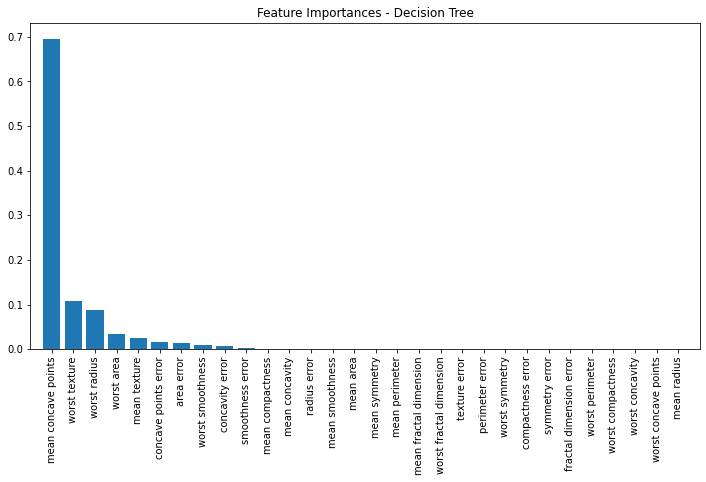

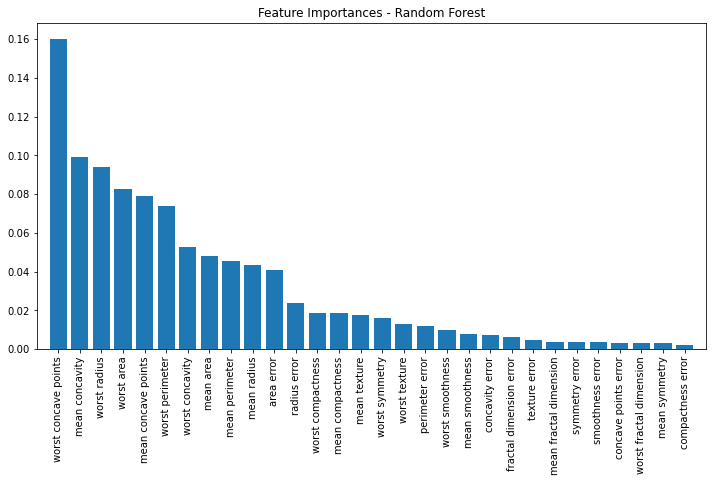

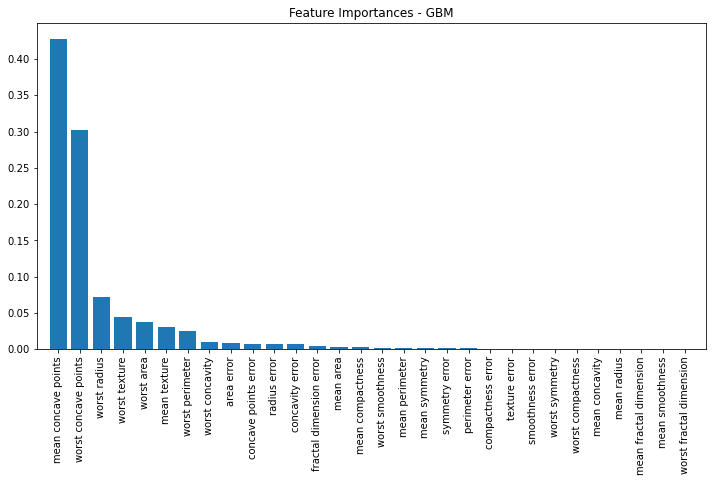

In [7]:
importances_dt = best_dt.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances - Decision Tree")
plt.bar(range(X_train.shape[1]), importances_dt[indices_dt], align="center")
plt.xticks(range(X_train.shape[1]), data.feature_names[indices_dt], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


importances_rf = best_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), data.feature_names[indices_rf], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


importances_gbm = best_gbm.feature_importances_
indices_gbm = np.argsort(importances_gbm)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances - GBM")
plt.bar(range(X_train.shape[1]), importances_gbm[indices_gbm], align="center")
plt.xticks(range(X_train.shape[1]), data.feature_names[indices_gbm], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

All three models agree on the importance of concave points, especially the **"Most concave points" and "Worst concave points"**, indicating that these features contain valuable information for distinguishing between benign and malignant tumors.
Features related to **radius, texture, and area (worst and mean)** also consistently appear among the top features across all models, further emphasizing their importance in identifying malignant tumors.
However, the specific ranking of features and their importance scores vary slightly between the models, reflecting differences in their internal mechanisms and how they handle feature importance calculations.

## Summary Table

| Machine Learning Method | Test Accuracy | Optimal Parameter |
| :---------------------: | :-----------: | :----------------: |
| Decision Tree     |     95.00%    | {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2} |
| Random Forest     |     97.00%    | {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} |
| Gradient Boosting Machine |     95.00%    | {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200} |

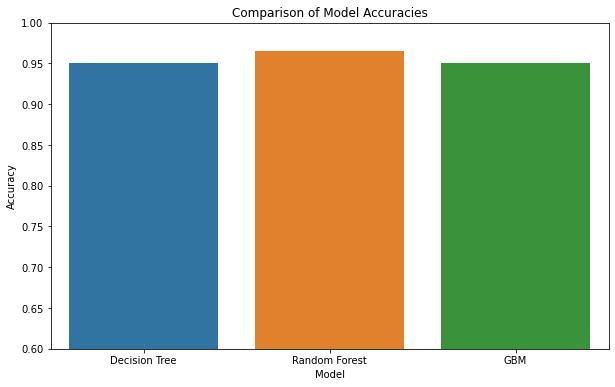

In [8]:
models = ['Decision Tree', 'Random Forest', 'GBM']
accuracies = [acc_dt, acc_rf, acc_gbm]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.ylim(0.6, 1)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()